In [222]:
import random
import math
import matplotlib.pyplot as plt
np.random.seed(42)

In [223]:
# Function to generate random user positions on the grid
def generate_random_users(m, n, num_users):
    users = []
    for _ in range(num_users):
        x = random.uniform(0, m)  # X-coordinate
        y = random.uniform(0, n)  # Y-coordinate
        users.append((x, y))
    return users

In [224]:
# Function to calculate distance between two points
def distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

In [225]:
# Function to find users covered by a UAV at a given position
def users_covered_by_uav(uav_pos, users, coverage_radius):
    covered_users = []
    for user in users:
        if distance(uav_pos, user) <= coverage_radius:
            covered_users.append(user)
    return covered_users


In [226]:
import numpy as np
np.array([1,2,3,4]) == np.array([2,4,5,6])

array([False, False, False, False])

In [227]:
# Greedy algorithm to place UAVs
def place_uavs_greedy(m, n, users, coverage_radius, coverage_threshold=0.9):
    uav_positions = [(i, j) for i in range(m) for j in range(n)]
    selected_uavs = []
    covered_users = set()
    total_users = len(users)
    required_coverage = coverage_threshold * total_users
    
    uav_cover_dict = []

    while len(covered_users) < required_coverage:
        best_uav = None
        best_covered_users = set()

        for uav_pos in uav_positions:
            current_covered_users = set(users_covered_by_uav(uav_pos, users, coverage_radius))
            new_covered_users = current_covered_users - covered_users
            
            #  Penalty

            penalty = 0

            if len(uav_cover_dict) >= 0:
                for cov_users in uav_cover_dict:
                    penalty += len(cov_users) -  len(cov_users - best_covered_users)

            penalty = 0.3 * penalty        
            
            if len(new_covered_users) - penalty > len(best_covered_users):
                best_uav = uav_pos
                best_covered_users = new_covered_users

        if best_uav is None:
            break

        selected_uavs.append(best_uav)
        covered_users.update(best_covered_users)
        uav_positions.remove(best_uav)
        uav_cover_dict.append(best_covered_users)
        
    
    return selected_uavs, covered_users

In [228]:
# Function to visualize the grid, users, and UAV coverage
def visualize_grid(m, n, users, selected_uavs, coverage_radius):
    plt.figure(figsize=(6, 6))
    
    # Plot users
    for user in users:
        plt.plot(user[0], user[1], 'bo', label='User' if users.index(user) == 0 else "")

    # Plot UAV coverage
    for uav in selected_uavs:
        circle = plt.Circle(uav, coverage_radius, color='r', alpha=0.3, label='UAV Coverage' if selected_uavs.index(uav) == 0 else "")
        plt.gca().add_patch(circle)
        plt.plot(uav[0], uav[1], 'rx', markersize=10, label='UAV Position' if selected_uavs.index(uav) == 0 else "")
    
    # Set plot limits and labels
    plt.xlim(0, m)
    plt.ylim(0, n)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True)
    plt.xlabel('Grid X')
    plt.ylabel('Grid Y')
    plt.title('UAV Coverage on Grid')
    plt.legend()
    plt.show()

In [229]:
# Example usage
m, n = 8,8  # Grid size
num_users = 100  # Number of users
coverage_radius = 2.5  # Coverage radius of each UAV

In [230]:
# Generate random users
users = generate_random_users(m, n, num_users)

In [231]:
# Place UAVs using the greedy algorithm
selected_uavs, covered_users = place_uavs_greedy(m, n, users, coverage_radius)

In [232]:
# Output the results
print(f"Total users: {num_users}")
print(f"Covered users: {len(covered_users)}")
print(f"Coverage percentage: {len(covered_users) / num_users * 100:.2f}%")
print(f"Number of UAVs placed: {len(selected_uavs)}")
print(f"UAV positions: {selected_uavs}")

Total users: 100
Covered users: 95
Coverage percentage: 95.00%
Number of UAVs placed: 4
UAV positions: [(3, 2), (6, 6), (2, 6), (6, 2)]


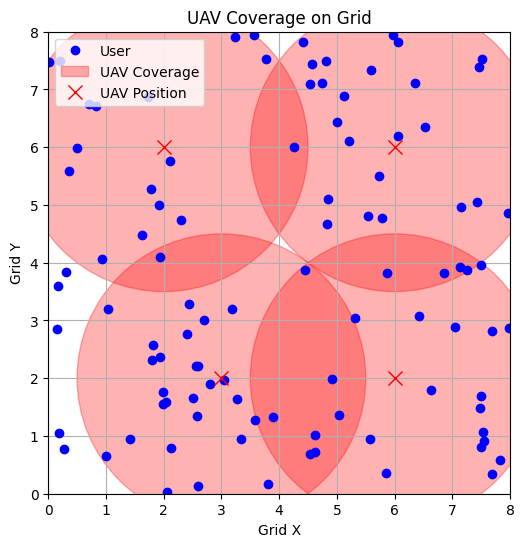

In [233]:
# Visualize the result
visualize_grid(m, n, users, selected_uavs, coverage_radius)